In [1]:
using DelimitedFiles
using Plots
using Statistics
using LinearAlgebra
using CSV, DataFrames
using NPZ

In [2]:
path1="z0.50/BAO/"
path2="z0.50/noBAO/"

"z0.50/noBAO/"

In [10]:
Nfiles = 0  #number of mocks
pkm_nbao = zeros(30, 1);
pkm_bao = zeros(30, 1);
pkrm= zeros(30,1);
pkr = zeros(30,922);
k= zeros(30,1);
for filename1 in readdir(path1)
    if filename1[1:3] == "Pk_" && isfile(string(path2,filename1))
        pk_nbao = readdlm(string(path2,filename1))
        pk_bao = readdlm(string(path1,filename1))
        Nfiles += 1
        pkm_nbao += pk_nbao[:,2]
        pkm_bao += pk_bao[:,2]
        k=pk_nbao[:,1]
        pkr[:,Nfiles]=pk_bao[:,2]      
    end
end
pkrm=pkm_bao./pkm_nbao
pkm_nbao=pkm_nbao/Nfiles
pkr=pkr[:,:]./pkm_nbao[:]
#print(size(pkm_nbao))
#var=varm(all_Bk,Bkk_mean[:,4]; dims=2, corrected=false);

In [11]:
data=Dict([("k",k),("pkrm",pkrm),("pkr",pkr)]);

In [12]:
npzwrite("pkr_z0.50.npz", data)

In [6]:
data

Dict{String, Array{Float64, N} where N} with 3 entries:
  "k"    => [0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.0…
  "pkrm" => [0.999903; 1.00282; … ; 1.00331; 1.00278]
  "pkr"  => [1.1557 0.357183 … 1.50682 0.573552; 0.948738 0.829173 … 1.0288 0.8…

### Saving bao and nobao separately and not the ratios

In [5]:
Nfiles = 0  #number of mocks
pkm_nbao = zeros(30, 1);
pkm_bao = zeros(30, 1);
pk_bao= zeros(30,922);
pk_nbao= zeros(30,922);
k= zeros(30,1);
for filename1 in readdir(path1)
    if filename1[1:3] == "Pk_" && isfile(string(path2,filename1))
        nbao = readdlm(string(path2,filename1))
        bao = readdlm(string(path1,filename1))
        Nfiles += 1
        pkm_nbao += nbao[:,2]
        pkm_bao += bao[:,2]
        k=bao[:,1]
        pk_bao[:,Nfiles]=bao[:,2]
        pk_nbao[:,Nfiles]=nbao[:,2]
    end
end
pkm_bao=pkm_bao/Nfiles
pkm_nbao=pkm_nbao/Nfiles
print(Nfiles)

922

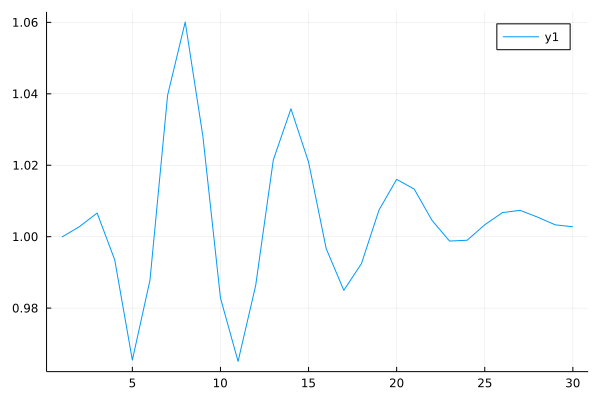

In [6]:
plot(pkm_bao./pkm_nbao)

In [7]:
data=Dict([("k",k),("pkn",pk_nbao),("pk",pk_bao),("pknm",pkm_nbao),("pkm",pkm_bao)]);
data

Dict{String, Array{Float64, N} where N} with 5 entries:
  "pk"   => [15.2937 4.72668 … 19.9401 7.58994; 11.5949 10.1337 … 12.5734 10.91…
  "k"    => [0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.0…
  "pkm"  => [13.2319; 12.256; … ; 0.599103; 0.569535]
  "pkn"  => [11.1045 16.5266 … 13.8814 19.4634; 12.184 12.2534 … 12.4263 12.472…
  "pknm" => [13.2332; 12.2214; … ; 0.597124; 0.567956]

In [8]:
npzwrite("pk_z0.50.npz", data)